In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import myplotlib as my

%matplotlib inline

%load_ext autoreload
%autoreload 2

In [2]:
# Set matplotlib defaults
matplotlib = my.utilities.set_mpl_defaults(matplotlib)

# Make some data

In [3]:
np.random.seed(11)
variables = ["a", "b", "c", "d", "e", "f", "g", "h"]
data = pd.DataFrame(
    {
        v: np.random.normal(
            loc=np.random.uniform(), scale=np.random.uniform(0.5, 1.0), size=50
        )
        for v in variables
    }
)
data.columns.name = "Group"

# Histogram

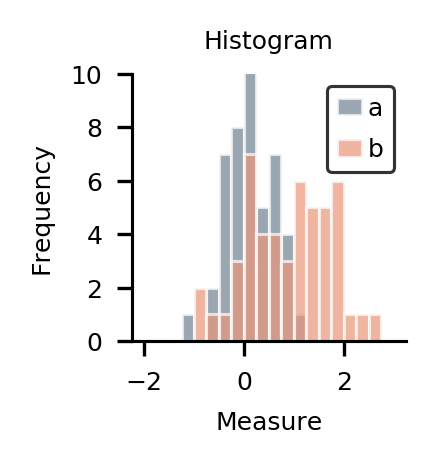

In [4]:
bins = np.linspace(-2, 3, 21)
fig, ax = plt.subplots(dpi=300, figsize=my.utilities.cm2inch(3, 3))

ax = my.plots.hist(data['a'], ax=ax, bins=bins, alpha=0.7, label='a')
ax = my.plots.hist(data['b'], ax=ax, bins=bins, alpha=0.7, label='b')
ax.legend()
ax.set_xlabel('Measure')
ax.set_ylabel('Frequency')
ax.set_ylim(0, 10)
ax.set_title('Histogram')
plt.savefig("examples/histogram.png", bbox_inches="tight")

# Violin Plot

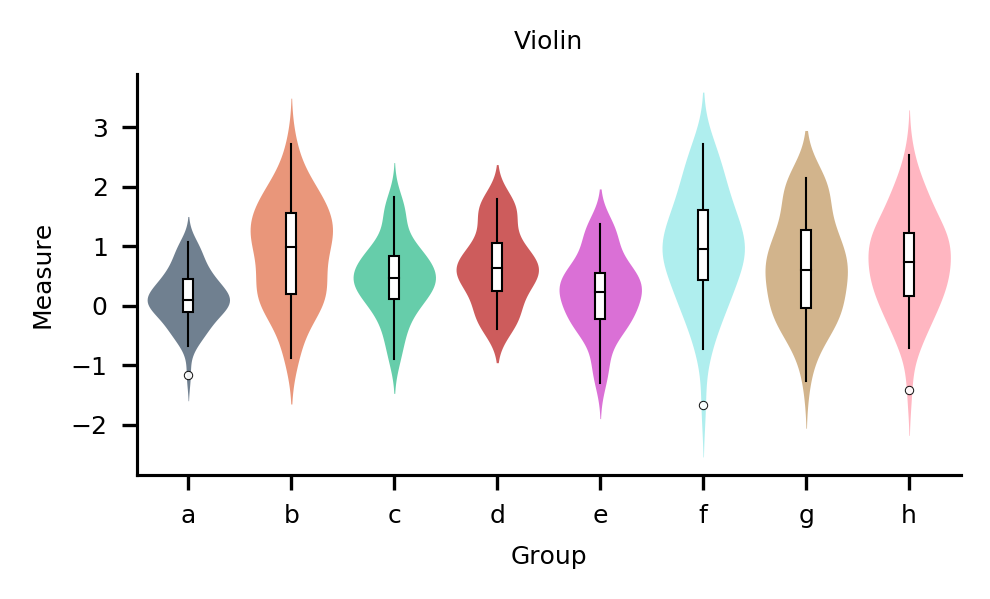

In [5]:
fig, ax = plt.subplots(dpi=300, figsize=my.utilities.cm2inch(9, 4.5))
ax = my.plots.violin(data, value_name="Measure", ax=ax)
ax.set_title('Violin')
plt.savefig("examples/violin.png", bbox_inches="tight")

# Scatter

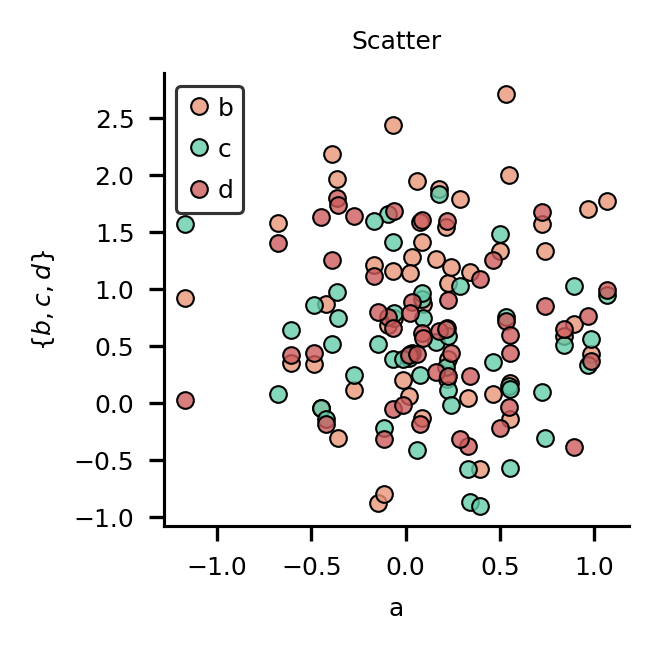

In [6]:
fig = plt.figure()
plt.plot([])  # skip first color, so that variables always have the same color
my.plots.scatter(data["a"], data["b"], label="b")
my.plots.scatter(data["a"], data["c"], label="c")
ax = my.plots.scatter(data["a"], data["d"], label="d")
ax.set_xlabel("a")
ax.set_ylabel("$\{b, c, d\}$")
ax.legend()
ax.set_title("Scatter")
plt.savefig("examples/scatter.png", bbox_inches="tight")

# Linear model

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sd, x, Intercept]
Sampling 4 chains, 0 divergences: 100%|██████████| 4000/4000 [00:01<00:00, 3314.65draws/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sd, x, Intercept]
Sampling 4 chains, 0 divergences: 100%|██████████| 4000/4000 [00:01<00:00, 3762.86draws/s]


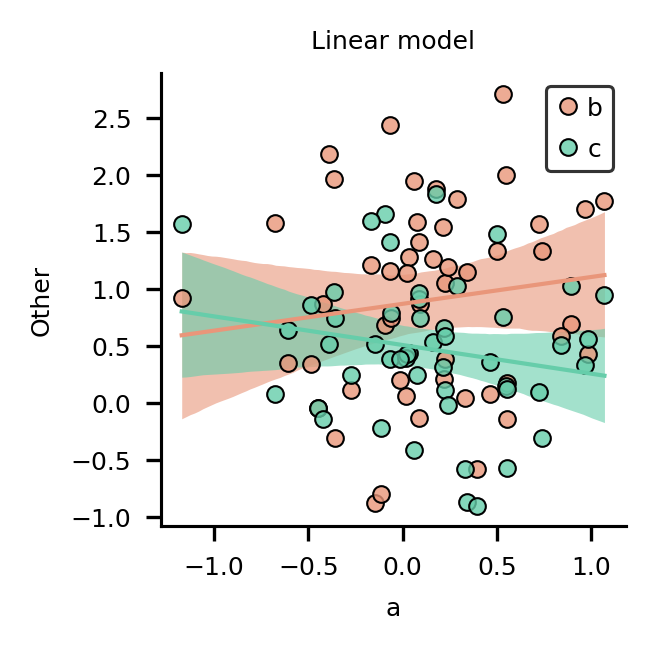

In [7]:
scatter_kws = dict()  # dict(edgealpha=0.7, facealpha=0.5)
fig, ax = plt.subplots()
plt.plot([])  # skip first color again
ax, trace_ab, summary_ab = my.plots.lm(
    data["a"], data["b"], scatter_kws=dict(scatter_kws, label="b")
)
ax, trace_ac, summary_ac = my.plots.lm(
    data["a"], data["c"], scatter_kws=dict(scatter_kws, label="c")
)
ax.legend()
ax.set_xlabel("a")
ax.set_ylabel("Other")

ax.set_title('Linear model')
plt.savefig('examples/lm.png', bbox_inches="tight")

## Factorial Heatmap

For this plot, we need to make a different dataset first:

In [8]:
import itertools


def product_dict(**kwargs):
    keys = kwargs.keys()
    vals = kwargs.values()
    for instance in itertools.product(*vals):
        yield dict(zip(keys, instance))


np.random.seed(1)
df = pd.DataFrame(
    list(
        product_dict(
            x0=[0, 1, 2], x1=[0, 1], x2=[0, 1, 2], x3=[0, 1, 2], x4=[0, 1], x5=[0, 1, 2]
        )
    )
)
betas = np.random.normal(size=6)
df["y"] = df[["x0", "x1", "x2", "x3", "x4", "x5"]].values.dot(betas)
df.head()

,x0,x1,x2,x3,x4,x5,y
0,0,0,0,0,0,0,0.000000
1,0,0,0,0,0,1,-2.301539
2,0,0,0,0,0,2,-4.603077
3,0,0,0,0,1,0,0.865408
4,0,0,0,0,1,1,-1.436131


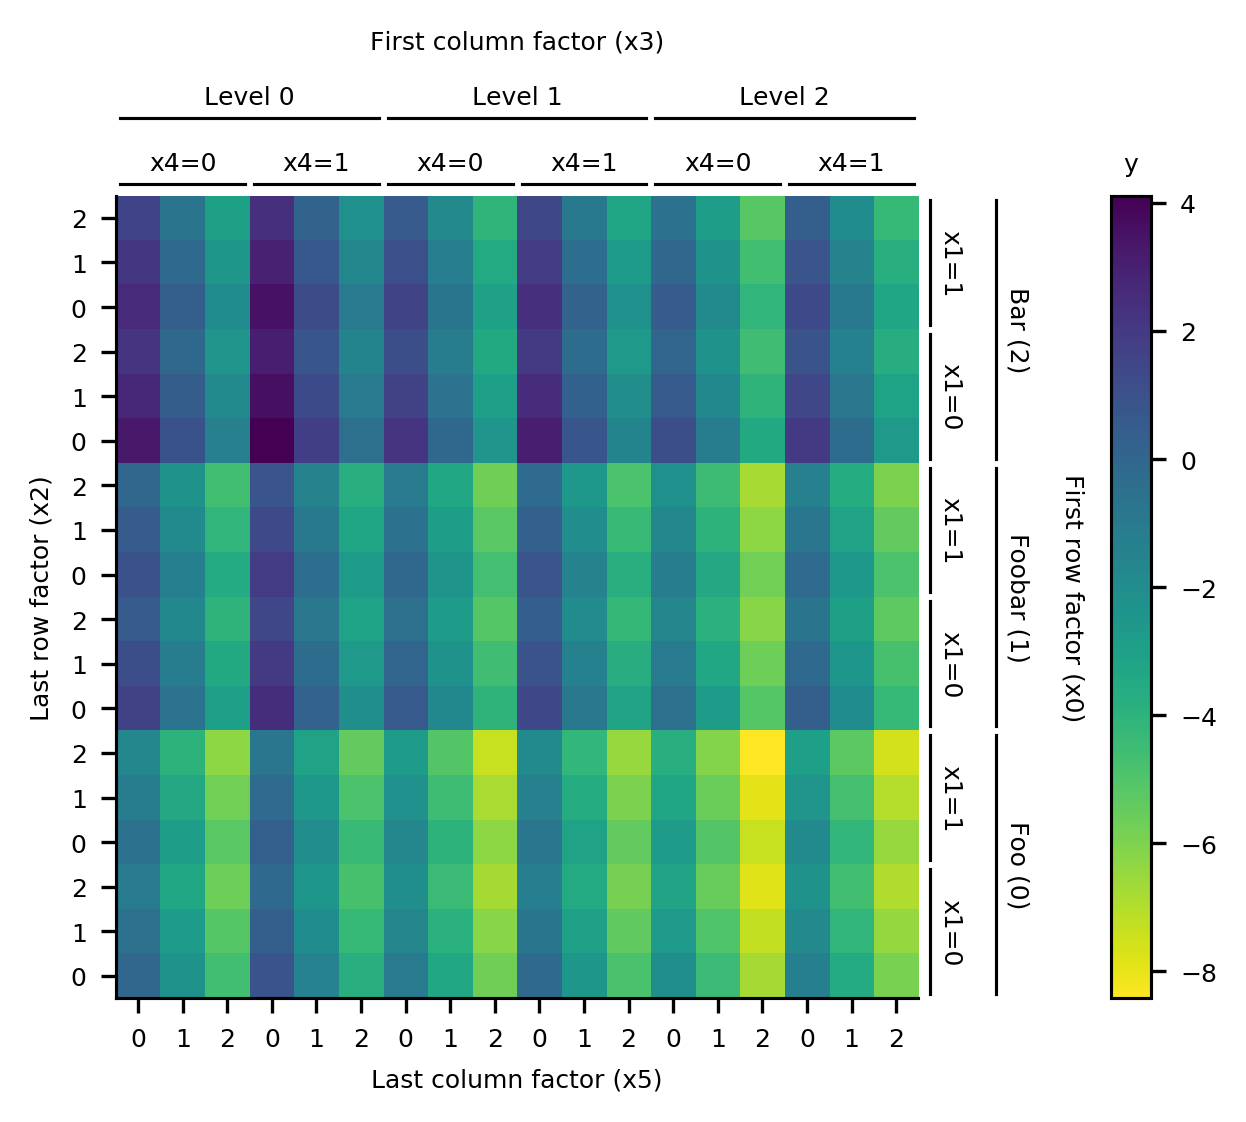

In [9]:
fig, ax = plt.subplots(figsize=my.utilities.cm2inch(14, 9), dpi=300)
ax = my.plots.factorial_heatmap(
    df,
    row_factors=["x0", "x1", "x2"],
    col_factors=["x3", "x4", "x5"],
    value_var="y",
    factor_labels={"x2": "Last row factor (x2)", "x5": "Last column factor (x5)"},
    level_labels={
        "x0": {0: "Foo (0)", 1: "First row factor (x0)\n\nFoobar (1)", 2: "Bar (2)"},
        "x3": {0: "Level 0", 1: "First column factor (x3)\n\nLevel 1", 2: "Level 2"},
    },
)
plt.savefig('examples/factorial_heatmap.png', bbox_inches="tight")

# Utilities
## Bar annotation

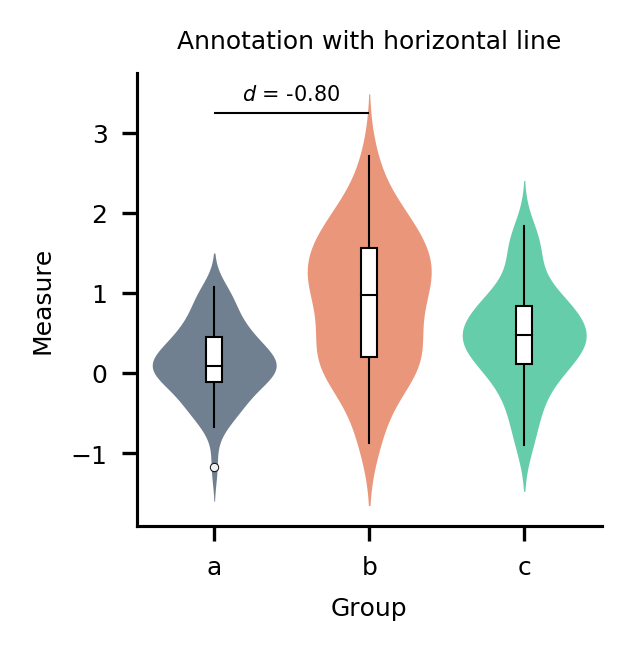

In [10]:
ax = my.plots.violin(data[["a", "b", "c"]], value_name="Measure")

# Annotation
sd_pooled = np.sqrt(np.std(data["a"]) ** 2 + np.std(data["b"]) ** 2)
d = (np.mean(data["a"]) - np.mean(data["b"])) / sd_pooled
ax = my.annotation.hTextLine(
    text="$d$ = {d:.2f}".format(d=d), x0=0, x1=1, y=3.25, ax=ax
)
ax.set_title('Annotation with horizontal line')
plt.savefig("examples/hTextLine.png", bbox_inches="tight")

## Axis labelling

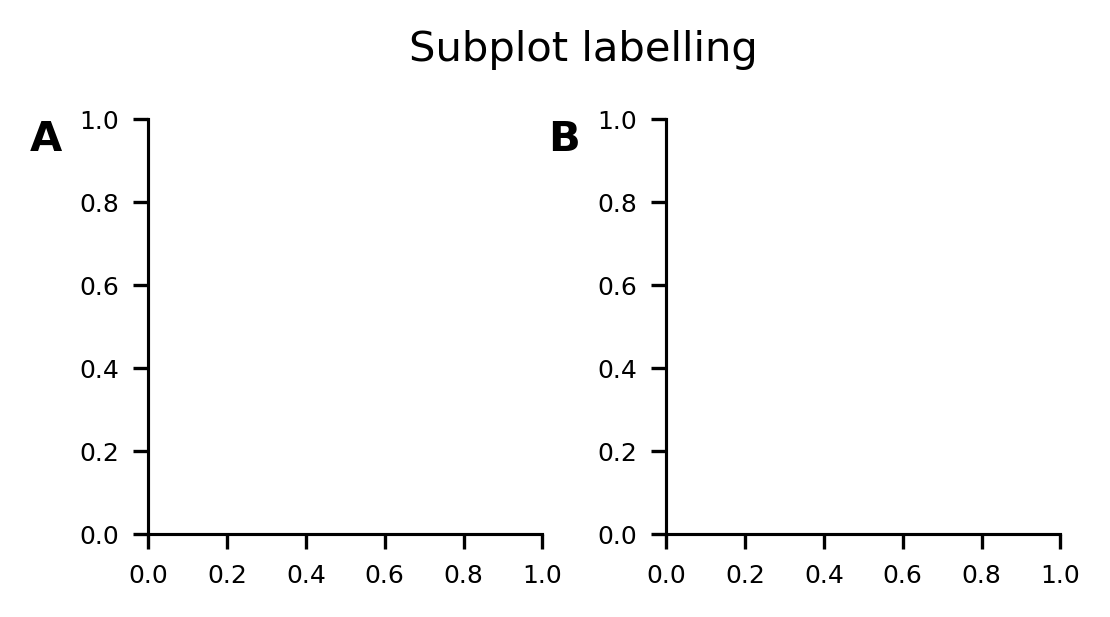

In [9]:
fig, axs = plt.subplots(1, 2, figsize=my.utilities.cm2inch(9, 4.5))

fig.tight_layout()
my.utilities.label_axes(
    fig,
    loc=(-0.3, 1.0),  # in axis-fraction
    labels=["A", "B"],  # defaults to lowercase if labels=NOne
    va="top",
    fontsize=10,
    fontweight="bold",
)
fig.suptitle('Subplot labelling', y=1.1, fontsize=10)
plt.savefig("examples/labelAxes.png", bbox_inches="tight")

## Axis breaking

**Note that this is purely visual, and does not change the actual plotted data**. I use it to better communicate if I set limits so that 0 is excluded from the range of values, but still want the axis origin to be labelled 0.

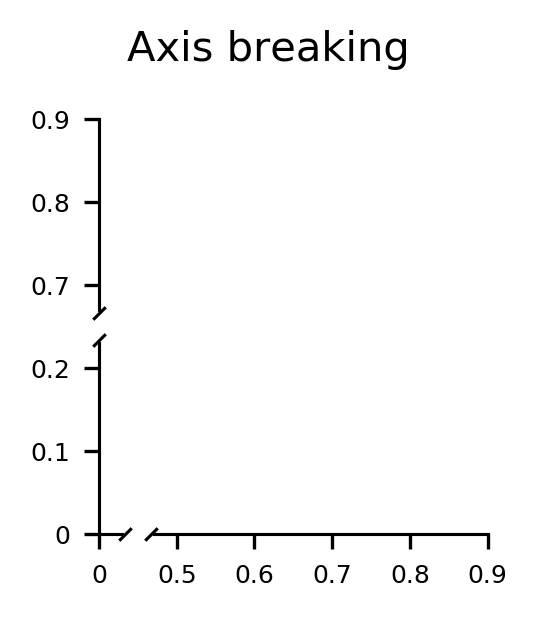

In [17]:
fig, ax = plt.subplots(1, 1, figsize=my.utilities.cm2inch(4.5, 4.5))

fig.tight_layout()
my.utilities.break_after_nth_tick(
    ax=ax, n=0, axis="x"
)
my.utilities.break_after_nth_tick(
    ax=ax, n=2, axis="y"
)

ax.set_xticklabels([0, 0.5, 0.6, 0.7, 0.8, 0.9])
ax.set_yticklabels([0, 0.1, 0.2, 0.7, 0.8, 0.9])

fig.suptitle('Axis breaking', y=1.1, fontsize=10)
plt.savefig("examples/breakAxes.png", bbox_inches="tight")

# Compositing

In [8]:
from scipy.stats import ttest_ind

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sd, x, Intercept]
Sampling 4 chains, 0 divergences: 100%|██████████| 4000/4000 [00:01<00:00, 2860.60draws/s]
The acceptance probability does not match the target. It is 0.8822671178987318, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8832966189574983, but should be close to 0.8. Try to increase the number of tuning steps.


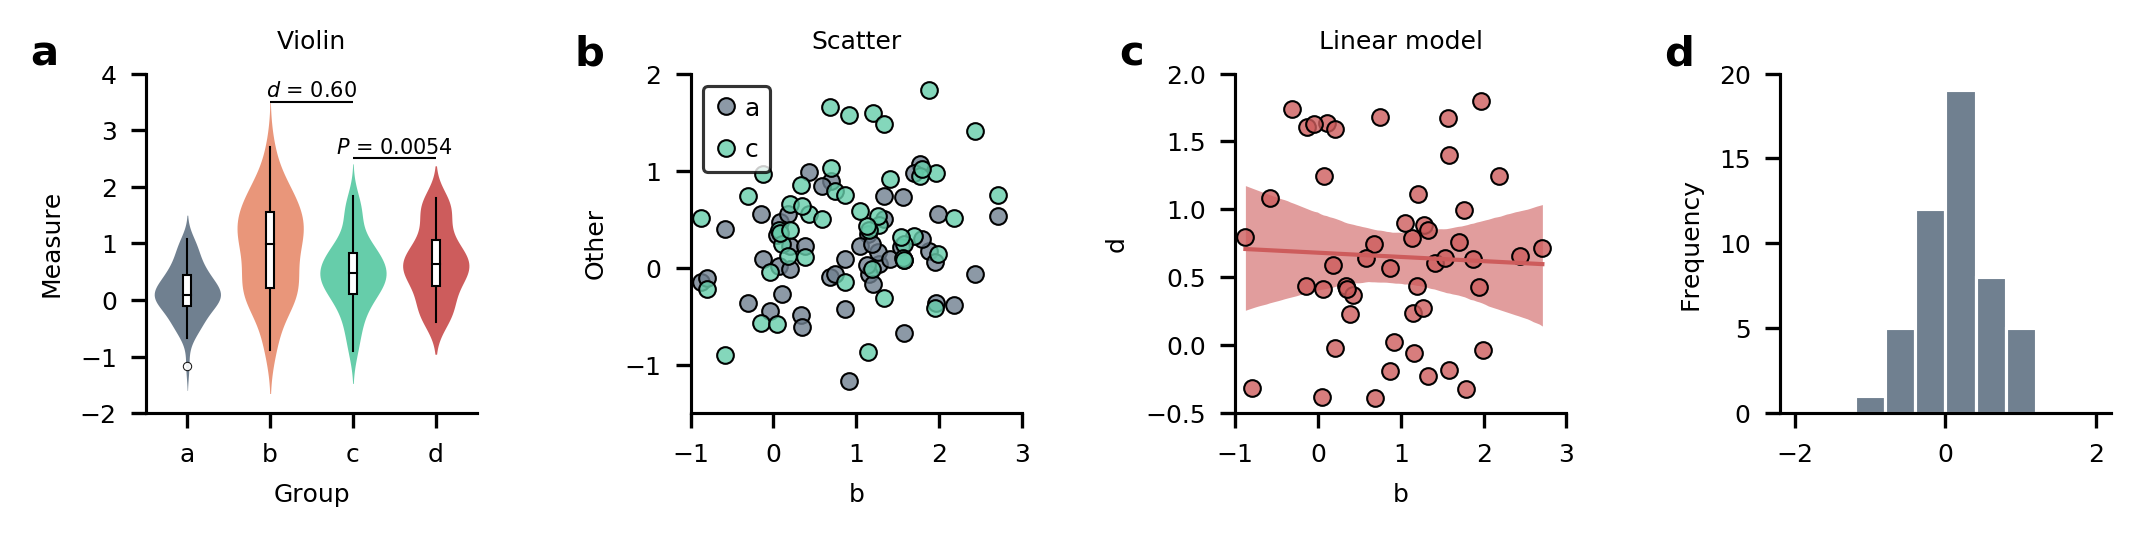

In [11]:
fig, axs = plt.subplots(1, 4, figsize=my.utilities.cm2inch(4 * 4.5, 4.5))

# Violin Plot
axs[0] = my.plots.violin(data[["a", "b", "c", "d"]], value_name="Measure", ax=axs[0])
axs[0].set_title("Violin")

# Annotations
d = np.mean(data["b"]) - np.mean(data["c"]) / np.sqrt(
    np.std(data["b"] ** 2) + np.std(data["c"] ** 2)
)
axs[0] = my.annotation.hTextLine(
    "$d$ = {d:.2f}".format(d=d), 1, 2, 3.5, ax=axs[0], lineTextGap=0.02
)

tval, pval = ttest_ind(data["c"], data["b"], equal_var=False)
if pval < 0.001:
    pstring = "$P$ < 0.001"
else:
    pstring = "$P$ = {pval:.4f}".format(pval=pval)
axs[0] = my.annotation.hTextLine(pstring, 2, 3, 2.5, lineTextGap=0.02, ax=axs[0])

axs[0].set_ylim(-2, 4)

# Scatter Plot
axs[1] = my.plots.scatter(data["b"], data["a"], label="a", ax=axs[1])
axs[1].plot([])  # skip color in cycle
axs[1] = my.plots.scatter(data["b"], data["c"], label="c", ax=axs[1])
axs[1].set_xlim(-1, 3)
axs[1].set_ylim(-1.5, 2)
axs[1].set_xlabel("b")
axs[1].set_ylabel("Other")
axs[1].legend()
axs[1].set_title("Scatter")


# LM Plot
for i in range(3):
    axs[2].plot(
        []
    )  # skip first colors so that relations of colors to variables are constant

lmout1 = my.plots.lm(data["b"], data["d"], label="d", ax=axs[2])
axs[2].set_xlabel("b")
axs[2].set_ylabel("d")
axs[2].set_xlim(-1, 3)
axs[2].set_ylim(-0.5, 2)
axs[2].set_title('Linear model')


# Histogram
axs[3] = my.plots.hist(data["a"], bins=np.linspace(-2, 2, 11))
axs[3].set_ylabel("Frequency")
axs[3].set_ylim(0, 20)

# Labelling
fig.tight_layout(w_pad=3)
my.utilities.label_axes(
    fig, fontsize=10, loc=(-0.35, 1.0), fontweight="bold", ha="left", va="bottom"
)

plt.savefig("examples/combination.png")